In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
!pip install feature-engine

     |████████████████████████████████| 180 kB 8.5 MB/s 
     |████████████████████████████████| 9.8 MB 25.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
dataframe = pd.read_csv("netflix.csv")

In [ ]:
dataframe.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
dataframe.drop(columns=["Unnamed: 0"],inplace=True)

KeyError: ignored

In [ ]:
def boxplot(dataframe,coluna):
  plt.figure(figsize=(12,7))
  sns.boxplot(dataframe[coluna])

In [ ]:
def encontra_limites(dataframe, coluna,distancia):
    
    IQR = dataframe[coluna].quantile(0.75)- dataframe[coluna].quantile(0.25)
    limite_inferior = dataframe[coluna].quantile(0.25)-(IQR*distancia)
    limite_superior = dataframe[coluna].quantile(0.75)+ (IQR*distancia)

    return limite_inferior, limite_superior

In [ ]:
dataframe.head(3)

,id,Nome,genero,cidade,carrinho
0,1,Gabbie,M,Arapongas,7433.00
1,2,Mimi,F,Curitba,873.81
2,3,Manya,F,Arapongas,966.41


In [ ]:
limite_inferior, limite_superior = encontra_limites(dataframe, "carrinho",1.5)

In [ ]:
limite_inferior, limite_superior

In [ ]:
carrinho_outlier = np.where(dataframe["carrinho"]>limite_superior,True,
                            np.where(dataframe["carrinho"]<limite_inferior,True,False))


In [ ]:
carrinho_outlier

In [ ]:
dataframe_limpo = dataframe.loc[~(carrinho_outlier)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


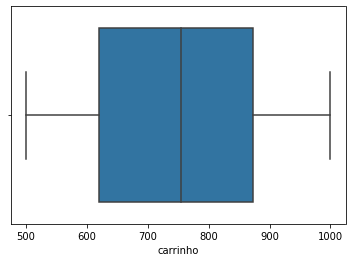

In [ ]:
sns.boxplot(dataframe_limpo["carrinho"])

In [ ]:
def boxplot(dataframe,coluna):
    plt.figure(figsize=(12,7))
    sns.boxplot(dataframe[coluna])
    texto = f"Boxplot referente a coluna: {coluna}"
    plt.title(texto)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


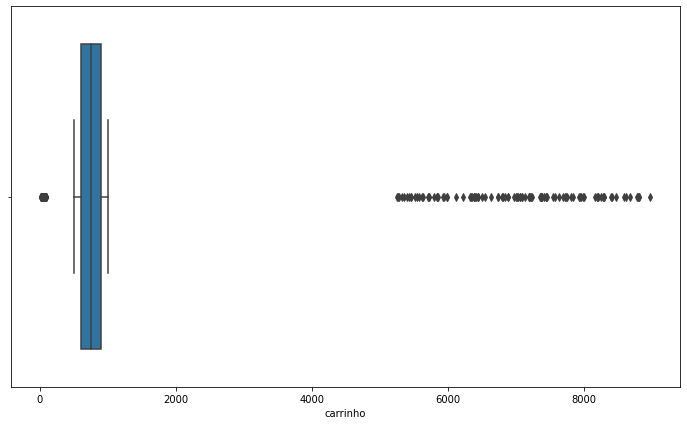

In [ ]:
boxplot(dataframe,"carrinho")

In [ ]:
def winsorizacao(dataframe, coluna,limite_superior,limite_inferior):
    return np.where(dataframe[coluna]>limite_superior,limite_superior, np.where(dataframe[coluna]<limite_inferior,limite_inferior,dataframe[coluna]))

In [ ]:
dataframe["carrinho"]= winsorizacao(dataframe,"carrinho",limite_superior,limite_inferior)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


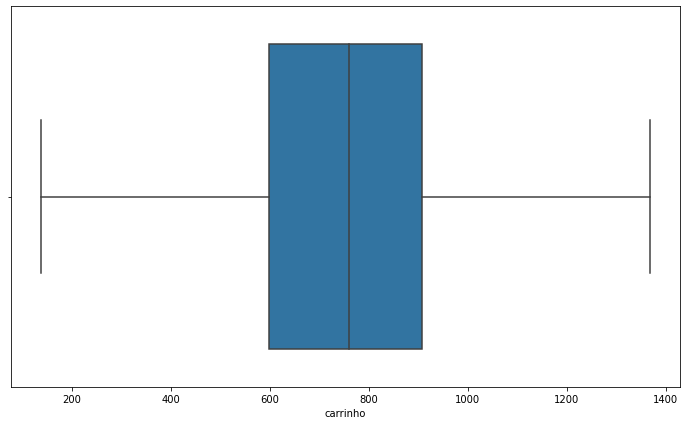

In [ ]:
boxplot(dataframe,"carrinho")

In [ ]:
dataframe['cidade'].value_counts() 

Arapongas      491
Curitba        201
Toledo         162
Contenda        72
Ibaiti          43
Cianorte        12
Chopinzinho     10
Arapoti          9
Name: cidade, dtype: int64

In [ ]:
dataframe2 = pd.read_csv("usuarios2.csv")

In [ ]:
dataframe2.head()

,id,Nome,gender,cidade
0,1,Lenard,M,Arapongas
1,2,Mommy,F,Curitba
2,3,Trude,F,Arapongas
3,4,Antonina,F,Arapongas
4,5,Lianna,F,Curitba


In [ ]:
(dataframe2['cidade'].value_counts() / len(dataframe2))*100

Arapongas      49.1
Curitba        20.1
Toledo         16.2
Contenda        7.2
Ibaiti          4.3
Cianorte        1.2
Chopinzinho     1.0
Arapoti         0.9
Name: cidade, dtype: float64

In [ ]:
dataframe["cidade"] = dataframe2["cidade"]

In [ ]:
dataframe.head()

,id,Nome,genero,cidade,carrinho
0,1,Gabbie,M,Arapongas,1368.2025
1,2,Mimi,F,Curitba,873.8100
2,3,Manya,F,Arapongas,966.4100
3,4,Brenda,F,Arapongas,923.5800
4,5,Hersch,M,Curitba,1368.2025


## Projeto pratico

In [ ]:
titanic = pd.read_csv("projeto2.csv")

In [ ]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


In [ ]:
titanic.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


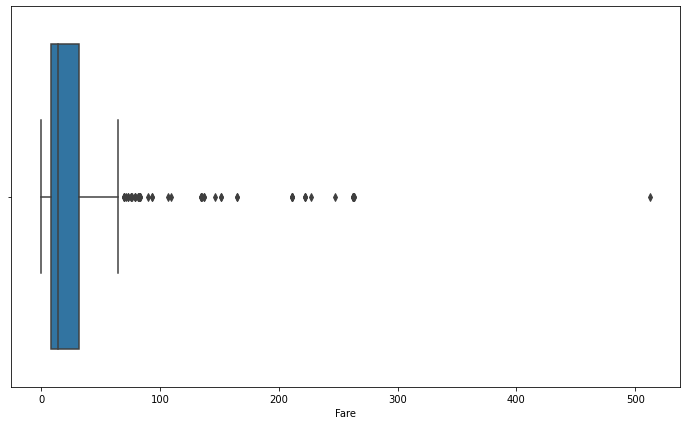

In [ ]:
boxplot(titanic,"Fare")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


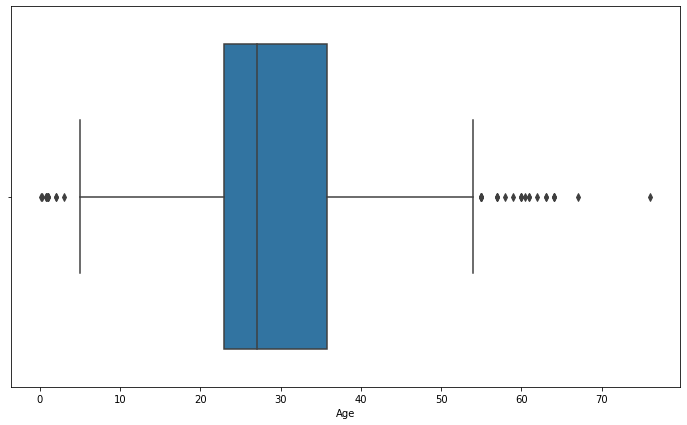

In [ ]:
boxplot(titanic,"Age")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0.0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0.0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0.0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0.0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,0.0,3101298,12.2875,S


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_treino, X_teste, y_treino, y_teste = train_test_split(titanic.drop("Survived",axis=1),titanic["Survived"],test_size=0.3,random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


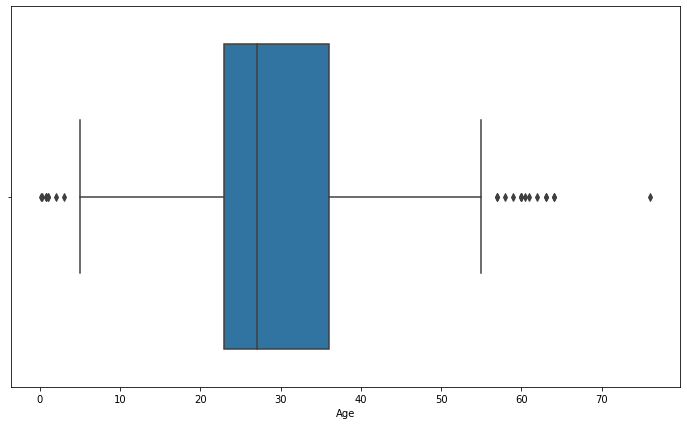

In [ ]:
boxplot(X_treino,"Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


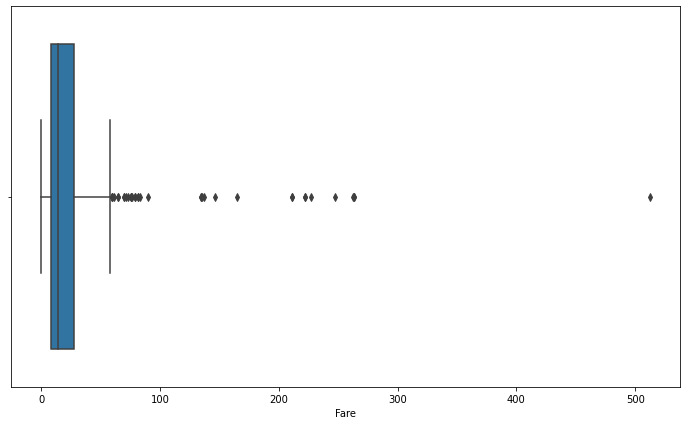

In [ ]:
boxplot(X_treino,"Fare")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


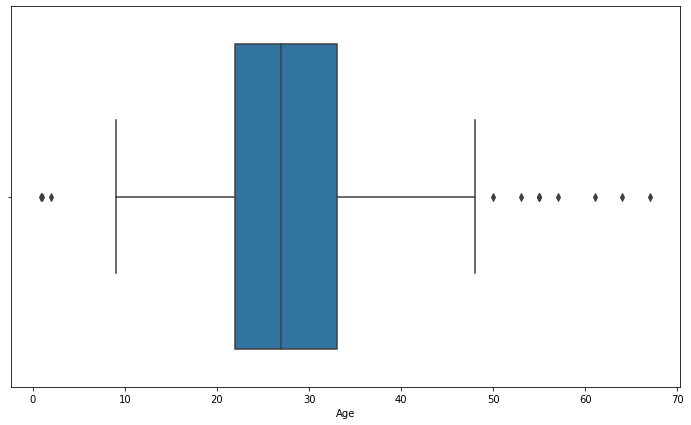

In [ ]:
boxplot(X_teste,"Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


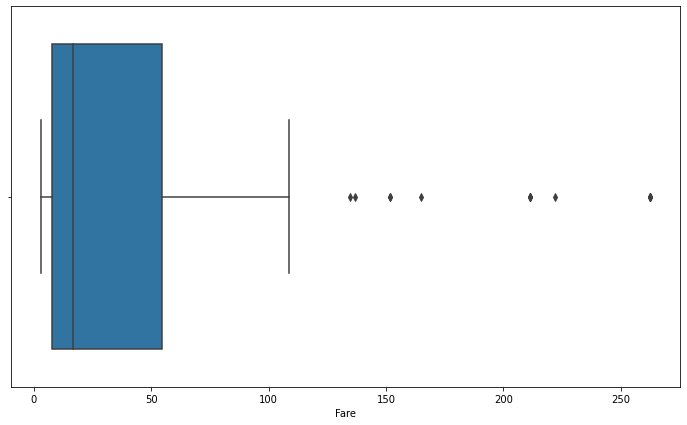

In [ ]:
boxplot(X_teste,"Fare")

In [ ]:
!pip install feature-engine

In [ ]:
from feature_engine.outliers import OutlierTrimmer

In [ ]:
capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=['Fare'])

In [ ]:
capper.fit(X_treino)

OutlierTrimmer(capping_method='iqr', fold=1.5, tail='both', variables=['Fare'])

In [ ]:
X_treino = capper.transform(X_treino)
X_teste = capper.transform(X_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


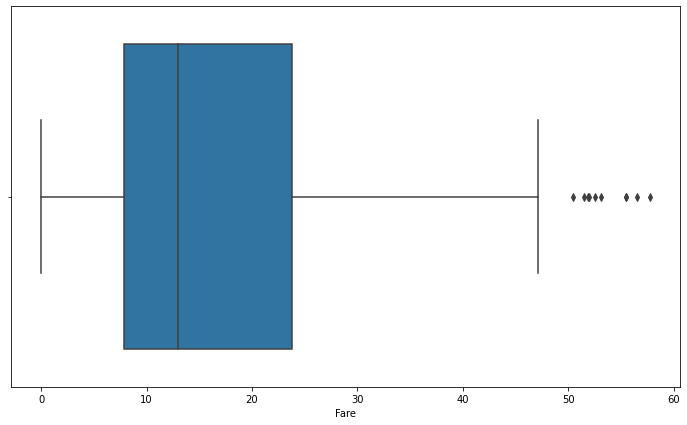

In [ ]:
boxplot(X_treino,"Fare")

In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
winsorizacao= Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Age'])


In [ ]:
winsorizacao.fit(X_treino)

Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['Age'])

In [ ]:
treino_t = winsorizacao.transform(X_treino)
teste_t = winsorizacao.transform(X_teste)

In [ ]:
teste_t = winsorizacao.transform(X_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


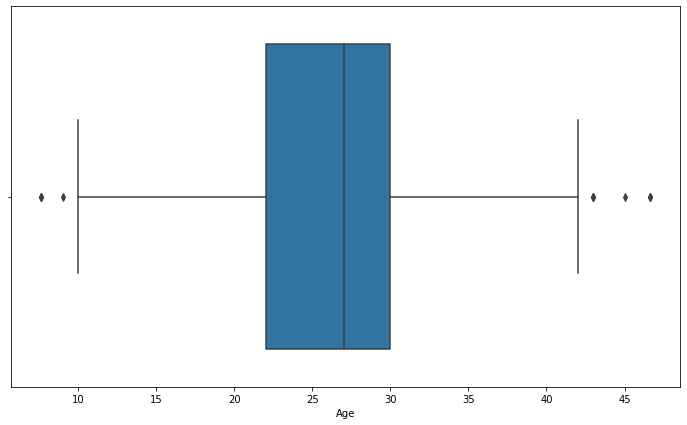

In [ ]:
boxplot(teste_t,"Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


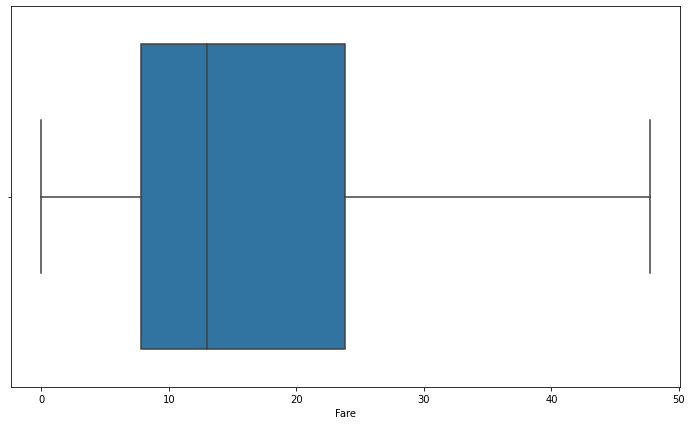

In [ ]:
boxplot(treino_t,"Fare")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


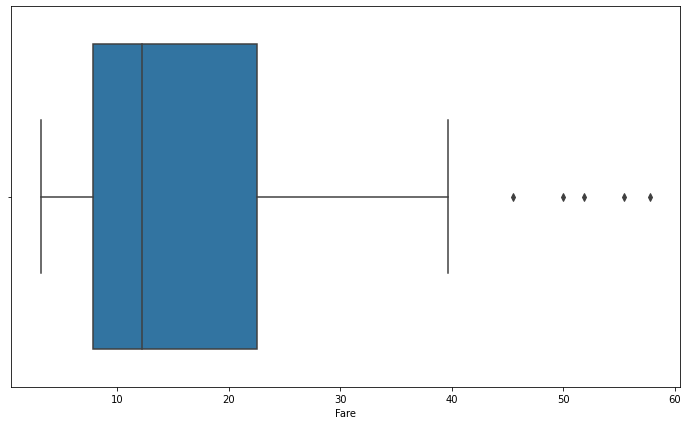

In [ ]:
boxplot(teste_t,"Fare")

# Projeto prático 2

In [ ]:
dataframe = pd.read_csv("spotify.csv",encoding= 'iso-8859-1')

In [ ]:
dataframe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
dataframe.drop(columns=["show_id","cast","date_added","description"],inplace=True)

In [ ]:
dataframe.head()

,type,title,director,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
len(dataframe)

14305

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
len(dataframe)

9444

In [ ]:
len(dataframe["release_year"].value_counts()/len(dataframe))

74

In [ ]:
dataframe.to_csv("netflix_projeto.csv",index=False)

In [ ]:
dataframe.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
from feature_engine.encoding import RareLabelEncoder

In [ ]:
rara = RareLabelEncoder(tol=0.05, n_categories=2, variables=["country","rating"],replace_with="rara")

In [ ]:
rara.fit(dataframe)

RareLabelEncoder(n_categories=2, replace_with='rara',
                 variables=['country', 'rating'])

In [ ]:
rara.encoder_dict_

{'country': Index(['United States', 'India'], dtype='object'),
 'rating': Index(['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13'], dtype='object')}

In [ ]:
dataframe_rara = rara.transform(dataframe)

In [ ]:
dataframe["country"].value_counts()/len(dataframe)

United States                                             0.293185
India                                                     0.185223
Nigeria                                                   0.025304
United Kingdom                                            0.024966
Japan                                                     0.023279
                                                            ...   
Mozambique                                                0.000337
France, Israel, Germany, United States, United Kingdom    0.000337
Belgium, Netherlands                                      0.000337
Spain, France, United Kingdom, United States              0.000337
Colombia, Mexico                                          0.000337
Name: country, Length: 379, dtype: float64

In [ ]:
dataframe_rara["country"].value_counts()/len(dataframe_rara)

rara             0.521592
United States    0.293185
India            0.185223
Name: country, dtype: float64

In [ ]:
dataframe["rating"].value_counts()/len(dataframe)

TV-MA    0.389001
TV-14    0.255061
R        0.118421
TV-PG    0.073549
PG-13    0.071525
PG       0.039136
TV-G     0.018556
TV-Y     0.018219
TV-Y7    0.012146
G        0.004049
NC-17    0.000337
Name: rating, dtype: float64

In [ ]:
dataframe_rara["rating"].value_counts()/len(dataframe_rara)

TV-MA    0.389001
TV-14    0.255061
R        0.118421
rara     0.092443
TV-PG    0.073549
PG-13    0.071525
Name: rating, dtype: float64